# Preprocessing


### 1. Binarylization image



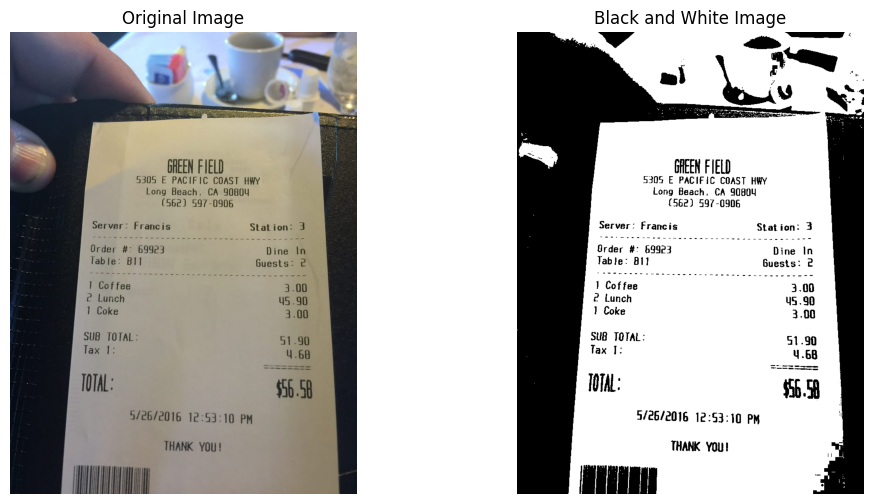

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('large-receipt-image-dataset-SRD/1000-receipt.jpg')

# Convert to black and white
bw_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bw_image = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY)[1]

# Display the original and modified images using Matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')

# Display the modified image
ax2.imshow(bw_image, cmap='gray')
ax2.set_title('Black and White Image')
ax2.axis('off')

plt.show()


## 2. Crop image


In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('large-receipt-image-dataset-SRD/1000-receipt.jpg')

# Convert to black and white
bw_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bw_image = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY)[1]

# Find the coordinates of the top left and bottom right pixels
top_left_pixel = None
bottom_right_pixel = None
min_sum = float('inf')  
max_sum = float('-inf')

# Set threshold be 10px
threshold = 20

# Iterate through the image to find the pixels
while top_left_pixel is None or bottom_right_pixel is None:
    for i in range(bw_image.shape[0]):
        for j in range(bw_image.shape[1]):
            if bw_image[i, j] == 255:  # Check if pixel is white
                pixel_sum = i + j
                if pixel_sum < min_sum:
                    for a in range(threshold):  # Fix the iteration through the range
                        if bw_image[i+a, j+(threshold-a)] == 255:
                            min_sum = pixel_sum
                            top_left_pixel = (i, j)
                            break
                        else:
                            top_left_pixel = None
                if pixel_sum > max_sum:
                    for a in range(threshold):
                            if bw_image[i-a, j-(threshold-a)] == 255:
                                max_sum = pixel_sum
                                bottom_right_pixel = (i, j)
                                break
                            else:
                                bottom_right_pixel = None

# Display the original and modified images using Matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')

# Display the modified image with coordinates
ax2.imshow(bw_image, cmap='gray')
ax2.set_title('Black and White Image with Coordinates')
ax2.axis('off')

# Add circles to the image at the top left and bottom right pixel coordinates
ax2.plot(top_left_pixel[1], top_left_pixel[0], 'ro', markersize=10)
ax2.plot(bottom_right_pixel[1], bottom_right_pixel[0], 'ro', markersize=10)

plt.show()


KeyboardInterrupt: 